In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing

df = pd.read_csv('econ_df_2.csv')
df.head()

,Unnamed: 0,employed,mental_illness,disabled,with_parents,months_gap,welfare_income,food_stamp,section_8,Household_Income
0,0,0,0,0,0,24,0,0,0,"$25,000-$49,999"
1,1,1,1,0,0,1,0,0,0,"$50,000-$74,999"
2,2,1,0,0,0,0,0,0,0,"$150,000-$174,999"
3,3,0,0,0,1,11,0,0,0,"$25,000-$49,999"
4,4,1,1,1,0,33,30,0,0,"$25,000-$49,999"


In [2]:
from sklearn import tree
X = df.drop(columns="Household_Income")
y = df["Household_Income"].values.reshape(-1, 1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)


[Text(4301.055623263019, 6392.736, 'X[5] <= 5.5\ngini = 0.859\nsamples = 296\nvalue = [27, 35, 24, 16, 14, 2, 20, 68, 57, 33]'),
 Text(2923.827588956217, 6131.808, 'X[0] <= 164.5\ngini = 0.862\nsamples = 221\nvalue = [9, 25, 21, 12, 13, 2, 19, 44, 45, 31]'),
 Text(1416.4439382204203, 5870.88, 'X[0] <= 21.0\ngini = 0.868\nsamples = 108\nvalue = [3, 5, 14, 9, 8, 1, 16, 16, 19, 17]'),
 Text(370.96614879948976, 5609.951999999999, 'X[2] <= 0.5\ngini = 0.764\nsamples = 12\nvalue = [2, 0, 3, 1, 2, 0, 0, 0, 4, 0]'),
 Text(214.76987562075723, 5349.023999999999, 'X[1] <= 0.5\ngini = 0.722\nsamples = 6\nvalue = [2, 0, 1, 0, 2, 0, 0, 0, 1, 0]'),
 Text(175.7208073260741, 5088.096, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(253.81894391544034, 5088.096, 'X[4] <= 0.5\ngini = 0.72\nsamples = 5\nvalue = [1, 0, 1, 0, 2, 0, 0, 0, 1, 0]'),
 Text(214.76987562075723, 4827.168, 'X[0] <= 4.0\ngini = 0.625\nsamples = 4\nvalue = [0, 0, 1, 0, 2, 0, 0, 0, 1, 0]'),
 Text(175.72080732

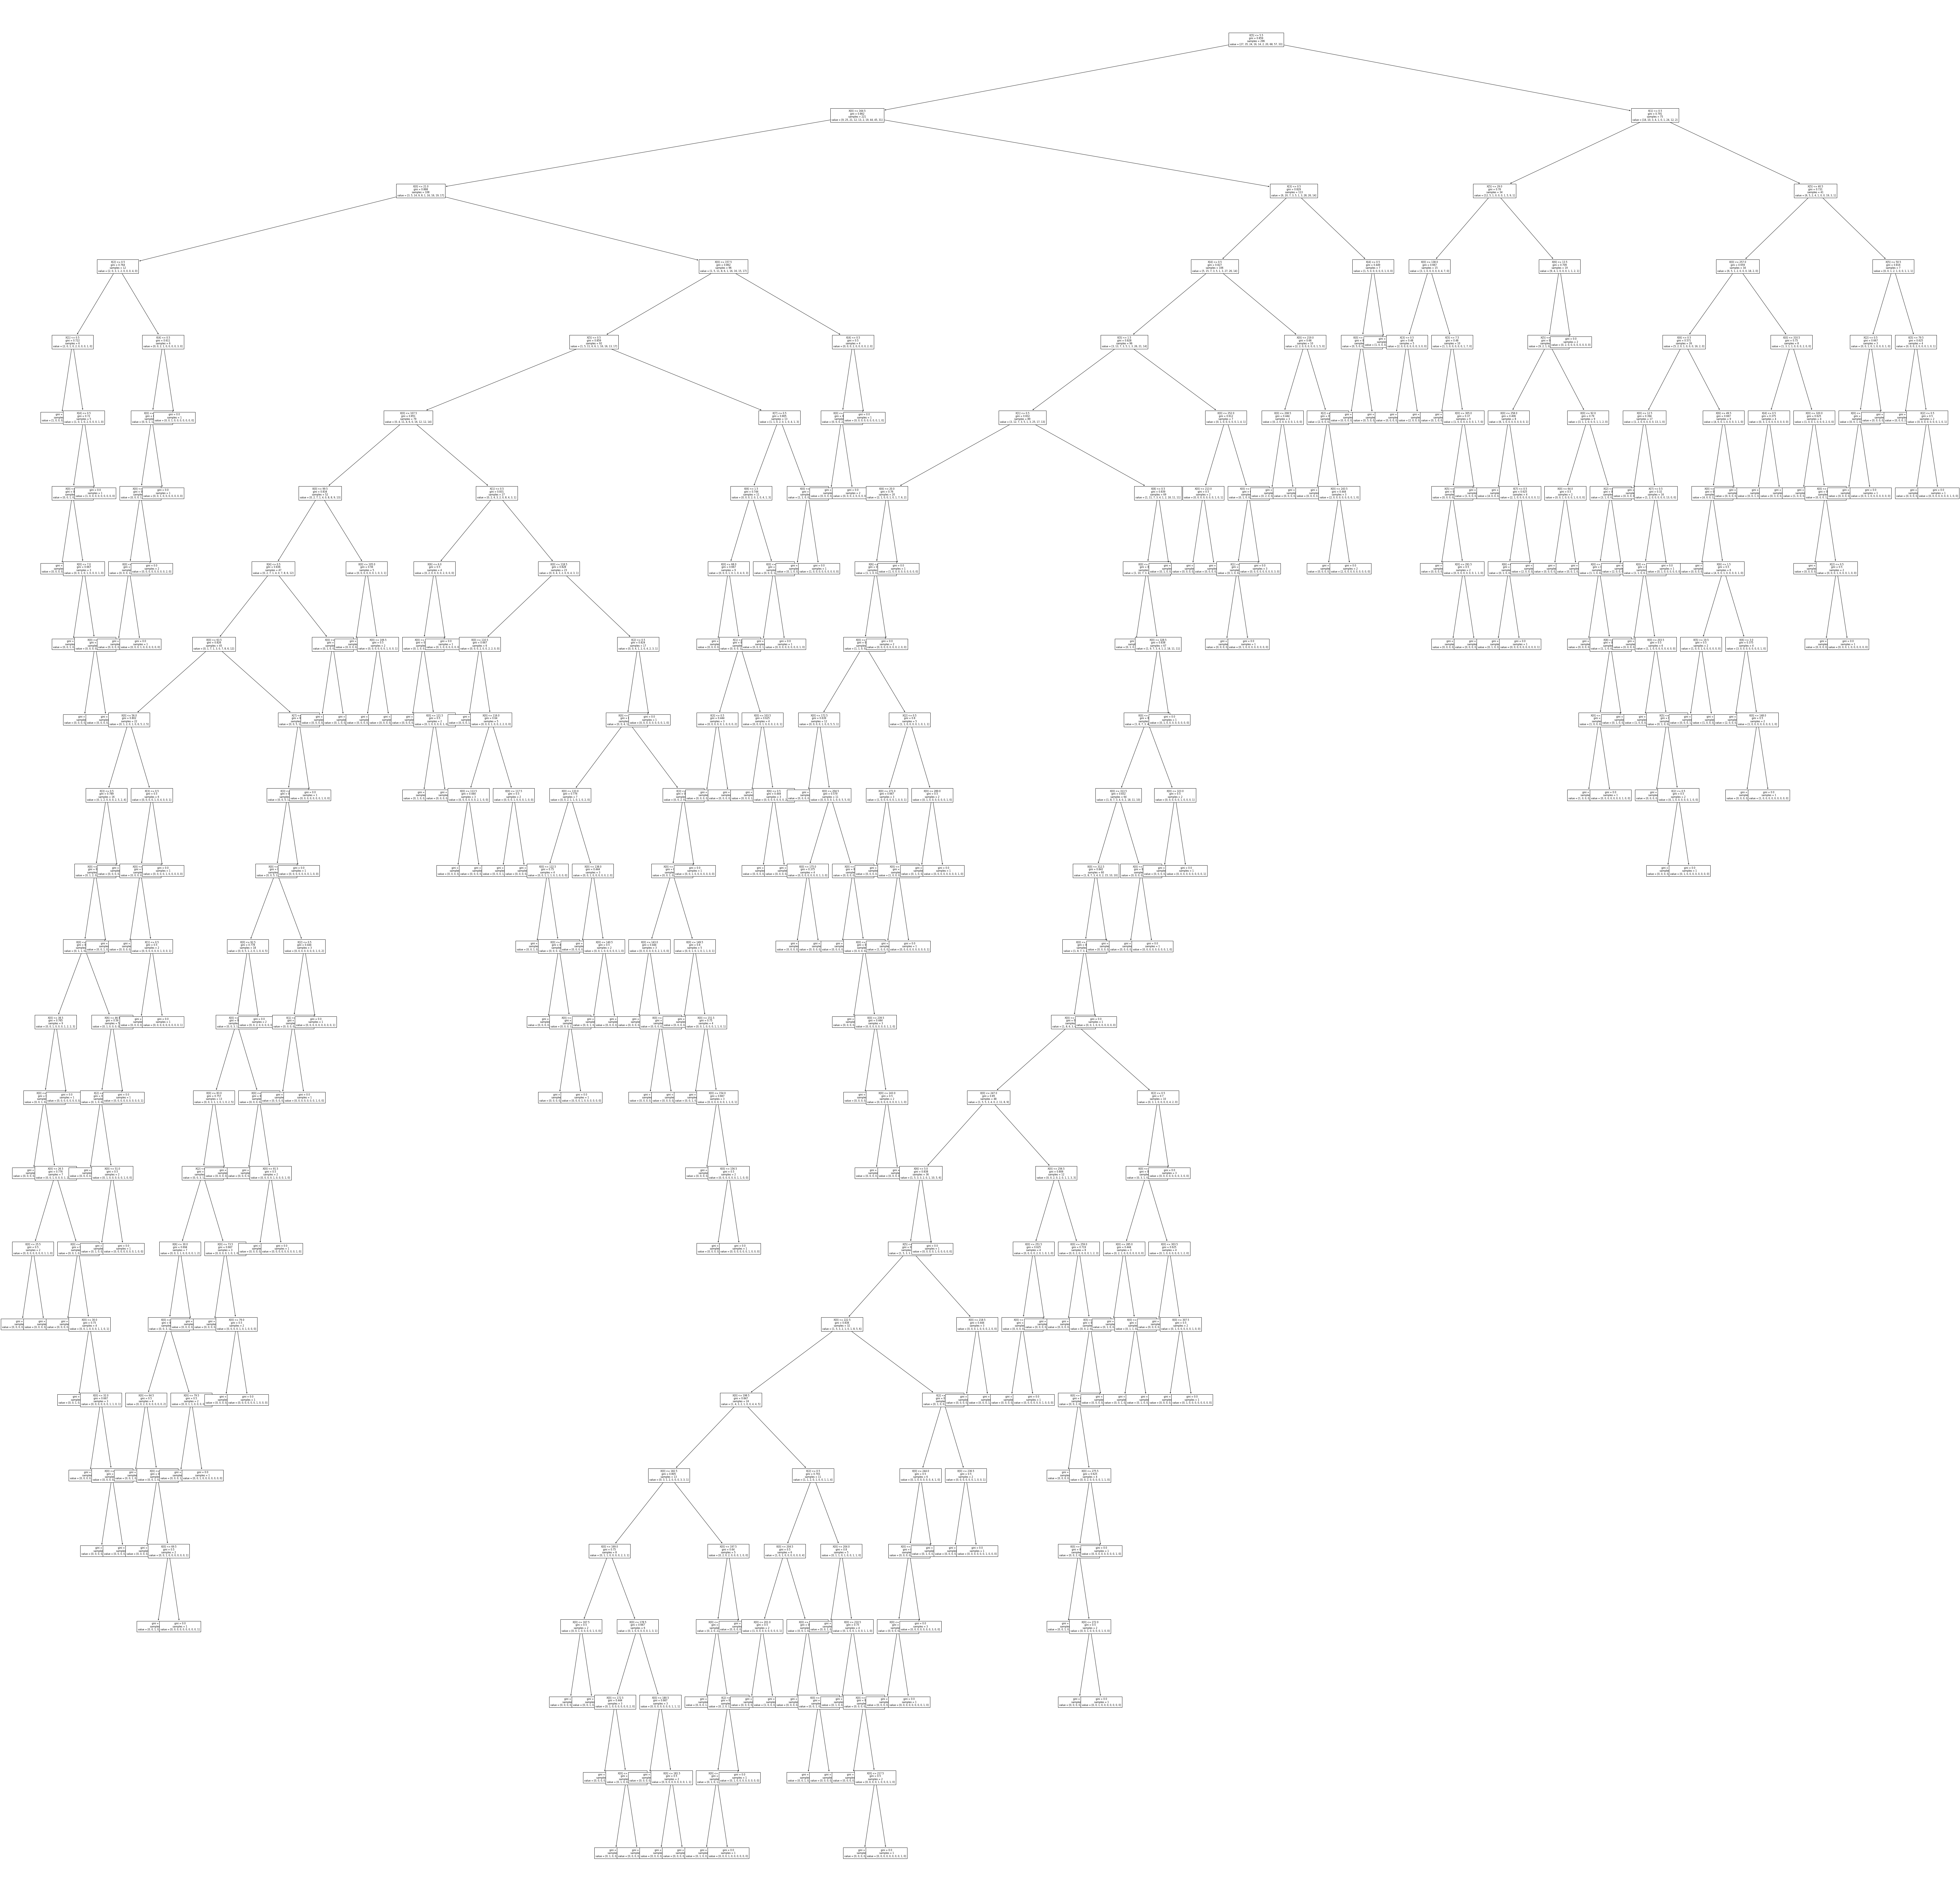

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(120, 120))
tree.plot_tree(clf, fontsize=8)

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\jason\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'

In [8]:
import graphviz 
import pydotplus

dot_data=tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=np.unique(y), filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph=graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
labelencoder = LabelEncoder()
labelencoder.fit(y)

y_encoded = labelencoder.transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y_encoded)
clf2.predict(y_encoded)